In [1]:
# Import packages.
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from sympy import symbols, Eq, solve
from sympy import Matrix
import scipy as sp
# Load the .mat file.
mat_contents=sio.loadmat('./stability_analysis_kohonen_ee.mat')

In [2]:
c = mat_contents['c'].squeeze()
dt = mat_contents['dt'].squeeze()
dtRate = mat_contents['dtRate'].squeeze()
eta_ee_kohonen = mat_contents['eta_ee_kohonen'].squeeze()
eRateT = mat_contents['eRateT'].squeeze()
iRateT = mat_contents['iRateT'].squeeze()
Ie_current = mat_contents['Ie_current_beta']
Ii_current = mat_contents['Ii_current_beta']
Ix_current = mat_contents['Ix_current_beta']
Jm = mat_contents['Jm']
Jxm = mat_contents['Jxm']
mC = mat_contents['mC']
Jee_recorded = mat_contents['Jee_recorded']
mean_Jee_recorded = np.zeros_like(Jee_recorded[0][0])
for i in range(len(Jee_recorded)):
    mean_Jee_recorded[i,:] = np.mean(Jee_recorded[i][0],axis=0)
mR = mat_contents['mR']
mV = mat_contents['mV']
N = mat_contents['N'].squeeze()
rx = mat_contents['rx'].squeeze()
seed = mat_contents['seed'].squeeze()
T = mat_contents['T'].squeeze()
T1 = mat_contents['T1'].squeeze()
T2 = mat_contents['T2'].squeeze()
tauSTDP = mat_contents['tauSTDP'].squeeze()
W = mat_contents['W']
winsize = mat_contents['winsize'].squeeze()
Wx = mat_contents['Wx']

beta_ee_kohonen_vector = mat_contents['beta_ee_kohonen_vector'].squeeze() *np.sqrt(N)

time_axis = np.linspace(0,T/1000,len(mean_Jee_recorded[0,:]))
print(eta_ee_kohonen,N)

0.01 5000


In [4]:
## Symbolic computation of the theoretical fixed point of the system for a set of different initial conditions.

jee = symbols('jee')
pex = 0.1; qx = 0.2;  qi = 0.2; qe = 0.8; pix=0.1;
pee = 0.1; pei = 0.1; pie = 0.1; pii = 0.1; jex = 180;
jix = 135; jei = -100; jie = 112.5; jii = -250;
taux = 10; taue = 8; taui = 4; tauc = 5;
wex = pex*qx*jex
wee = pee*qe*jee 
wix = pex*qi*jix 
wei = pei*qi*jei 
wie = pie*qe*jie 
wii = pii*qi*jii

W = Matrix(([wee, wei], [wie, wii]))
Wx = np.array([wex, wix]).reshape((2,1))

J_ee_theory = np.zeros((len(beta_ee_kohonen_vector),1))
r_e_theory = np.zeros((len(beta_ee_kohonen_vector),1))
r_i_theory = np.zeros((len(beta_ee_kohonen_vector),1))

for i in range(len(beta_ee_kohonen_vector)):
    r = -W.inv() @ (Wx * rx )
    eq1 = Eq( ((beta_ee_kohonen_vector[i])*tauSTDP*r[0,0]**2 - jee * r[0,0]) )
    soln = solve(eq1,jee)[0]
    J_ee_theory[i] = soln
    temp_e = r.subs(jee,J_ee_theory[i])[0]
    temp_i = r.subs(jee,J_ee_theory[i])[1]
    r_e_theory[i] = temp_e.evalf()
    r_i_theory[i] = temp_i.evalf()
    
# print(r_e_theory,r_i_theory)
print(J_ee_theory)


/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/sympy/core/relational.py:470: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  deprecated_since_version="1.5"


[[1.44649673]
 [1.74789167]
 [2.05372895]
 [2.36421097]
 [2.67955601]
 [3.        ]
 [3.32579858]
 [3.6572295 ]
 [3.99459538]
 [4.33822696]
 [4.68848687]
 [5.04577415]
 [5.41052956]
 [5.78324194]
 [6.16445593]
 [6.55478128]]


In [5]:
beta_ee_kohonen_vector

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4,
       3.6, 3.8, 4. ])

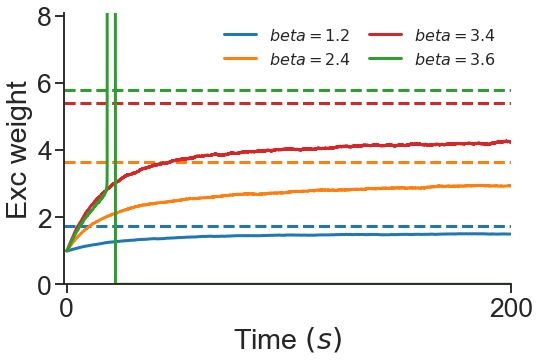

In [323]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":3.})

# for i in range(len(mean_Jee_recorded[:,0])):
#     plt.plot(time_axis,mean_Jee_recorded[i,:])
i=11

line1, = plt.plot(time_axis,mean_Jee_recorded[1,:],color='tab:blue',
         label="$beta=%.1f$" %beta_ee_kohonen_vector[1])
plt.axhline(y=J_ee_theory[1],color='tab:blue',linestyle='--')
line2, = plt.plot(time_axis,mean_Jee_recorded[7,:],color='tab:orange'
         ,label="$beta=%.1f$" %beta_ee_kohonen_vector[7])
plt.axhline(y=J_ee_theory[7],color='tab:orange',linestyle='--')
line3, = plt.plot(time_axis,mean_Jee_recorded[12,:],color='tab:red'
         ,label="$beta=%.1f$" %beta_ee_kohonen_vector[12])
plt.axhline(y=J_ee_theory[12],color='tab:red',linestyle='--')
line4, = plt.plot(time_axis,mean_Jee_recorded[13,:],color='tab:green'
         ,label="$beta=%.1f$" %beta_ee_kohonen_vector[13])
plt.axhline(y=J_ee_theory[13],color='tab:green',linestyle='--')

# line5, = plt.plot(time_axis,mean_Jee_recorded[4,:],color='tab:pink',linewidth=4
#          ,label="$beta=%.1f$" %beta_ee_kohonen_vector[4])


plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((-1,T/1000))
plt.ylim(0,8.1)

plt.xticks((0,T/1000))

leg = plt.legend(handles=[line1,line2],loc='upper center',fontsize=16,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)

ax = plt.gca().add_artist(leg)

leg1 = plt.legend(handles=[line3,line4],loc='upper right',fontsize=16,frameon='none',markerscale=1)
leg1.get_frame().set_linewidth(0.0)

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/stability_kohonen_sims.pdf", bbox_inches="tight")


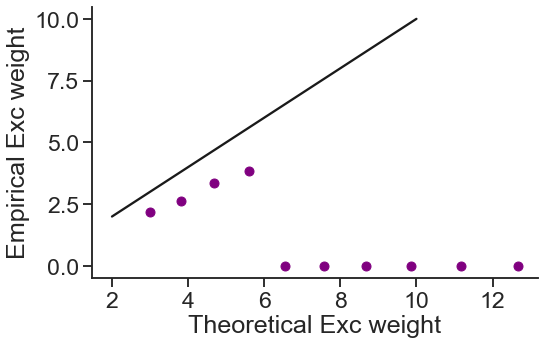

In [207]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})

# for i in range(len(mean_Jee_recorded[:,0])):
#     plt.plot(time_axis,mean_Jee_recorded[i,:])
i=10
# plt.plot(time_axis,mean_Jee_recorded[i,:])

plt.plot([2,10],[2,10], 'k')
plt.plot(J_ee_theory[:i],np.mean(mean_Jee_recorded[:i,len(mean_Jee_recorded[i,:])//2:-1],axis=1)
         ,'.',markersize=18, color='purple')

    
# print(beta_ee_kohonen_vector*np.sqrt(N))


plt.xlabel(r'Theoretical Exc weight')
plt.ylabel(r'Empirical Exc weight')

# plt.xlim((2,10))
# plt.ylim((2,10))

sns.despine()
plt.show()

The system undergoes a saddle--node bifurcation. The stable and unstable fixed points collide and disappear at about $\beta\approx 3.3$. 

Even though our theory predicts a saddle--node bifurcation, the theoretical estimation of when the bifurcation happens is $\beta \approx 8$, as shown in the next plot.

/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract
/opt/anaconda3/envs/bmnn/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in subtract


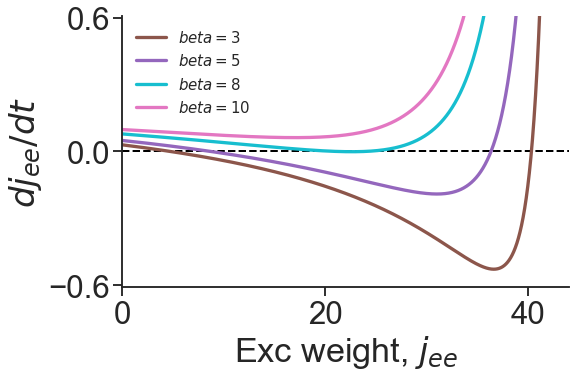

In [7]:
## Analysis of Kohonen's Rule. First plot the phase portrait and show Saddle node bifurcation.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.9, rc={"lines.linewidth":3.3})

# Parameters:
gamma=1
c = 0
tauSTDP = 200
Jee = np.linspace(0,45,5000)
beta=[3,5,8,10]
r_e = 0.315/ (45-Jee)
r_i = (0.81-0.0054*Jee) / (45-Jee)

plt.axhline(0, linestyle='--',linewidth=2,color='black')

# for i in range(len(beta)):
i=0
dJeedt = gamma * (beta[i] * tauSTDP * r_e**2 - Jee * r_e)
plt.plot(Jee,dJeedt, label="$beta =%.0f$" %beta[i],color = 'tab:brown')
i=1
dJeedt = gamma * (beta[i] * tauSTDP * r_e**2 - Jee * r_e)
plt.plot(Jee,dJeedt, label="$beta =%.0f$" %beta[i],color = 'tab:purple')
i=2
dJeedt = gamma * (beta[i] * tauSTDP * r_e**2 - Jee * r_e)
plt.plot(Jee,dJeedt, label="$beta =%.0f$" %beta[i],color = 'tab:cyan')
i=3
dJeedt = gamma * (beta[i] * tauSTDP * r_e**2 - Jee * r_e)
plt.plot(Jee,dJeedt, label="$beta =%.0f$" %beta[i],color = 'tab:pink')


plt.xlabel('Exc weight, $j_{ee}$' )
plt.ylabel('$dj_{ee}/dt$')

plt.xticks(np.arange(0,41,step = 20))
plt.yticks(np.arange(-0.6,0.61,step = 0.6))

plt.xlim((0,44))
plt.ylim((-0.61,0.61))

leg = plt.legend(loc='upper left',fontsize=15,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)

sns.despine()

fig.savefig("./PlotsReview_BNs/stability_kohonen_theory.pdf", bbox_inches="tight")


plt.show()

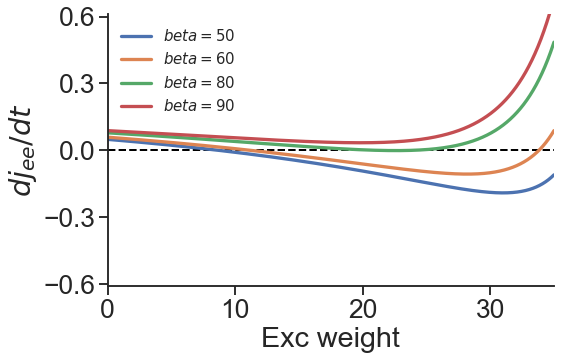

In [177]:
## Analysis of Kohonen's Rule. First plot the phase portrait and show Saddle node bifurcation.

# Start the figure.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":3.3})

# Parameters:
gamma=1
c = 0
tauSTDP = 20
Jee = np.linspace(0,35,5000)
beta=[50,60,80,90]
r_e = 0.315/ (45-Jee)
r_i = (0.81-0.0054*Jee) / (45-Jee)

plt.axhline(0, linestyle='--',linewidth=2,color='black')

for i in range(len(beta)):
    dJeedt = gamma * (beta[i] * tauSTDP * r_e**2 - Jee * r_e)
    plt.plot(Jee,dJeedt, label="$beta =%.0f$" %beta[i])



plt.xlabel('Exc weight' )
plt.ylabel('$dj_{ee}/dt$')

# plt.xticks(np.arange(0,51,step = 10))
plt.yticks(np.arange(-0.6,0.61,step = 0.3))

plt.xlim((0,35))
plt.ylim((-0.61,0.61))

leg = plt.legend(loc='upper left',fontsize=15,frameon='none',markerscale=1)
leg.get_frame().set_linewidth(0.0)

sns.despine()

# fig.savefig("./PlotsReview_BNs/stability_kohonen_theory.pdf", bbox_inches="tight")

plt.show()

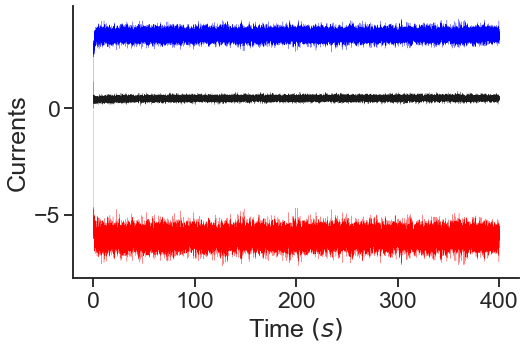

In [95]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":0.23})

# for i in range(len(Ie_current[:,0])-5):
#     plt.plot(time_axis,Ie_current[i,:],color='blue')
#     plt.plot(time_axis,Ii_current[i,:],color='red')
#     plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')
    
i=8
plt.plot(time_axis,Ie_current[i,:],color='blue')
plt.plot(time_axis,Ii_current[i,:],color='red')
plt.plot(time_axis,Ie_current[i,:]+Ii_current[i,:]+Ix_current[i,:],color='k')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Currents')

sns.despine()
plt.show()


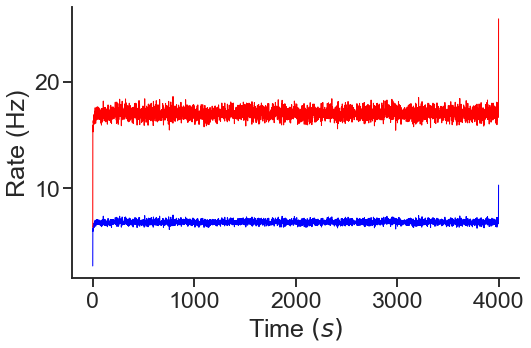

In [46]:
# Plot mean input over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":1.03})

# for i in range(len(Ie_current[:,0])-8):
#     plt.plot(1000*eRateT[i,:],color='blue')
#     plt.plot(1000*iRateT[i,:],color='red')
    
i=5
plt.plot(1000*eRateT[i,:],color='blue')
plt.plot(1000*iRateT[i,:],color='red')
    
# plt.axhline(y=1000*r_e_theory,color='blue',linestyle='--')
# plt.axhline(y=1000*r_i_theory,color='red',linestyle='--')

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Rate (Hz)')

sns.despine()
plt.show()

# fig.savefig("./Cosyne20_figs/corr_heatmap.pdf", bbox_inches="tight")


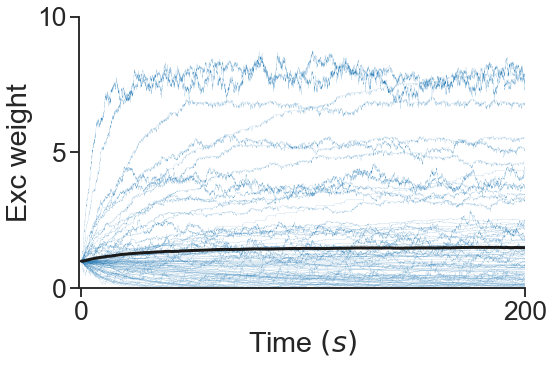

In [19]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":0.1})

beta_indx = 1
for i in range(100):
    plt.plot(time_axis,Jee_recorded[beta_indx][0][i],color='tab:blue',
             label="$beta=%.1f$" %beta_ee_kohonen_vector[beta_indx])
# plt.axhline(y=J_ee_theory[0],color='tab:blue',linestyle='--')
plt.plot(time_axis,mean_Jee_recorded[beta_indx,:],color='k',linewidth=3)

plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((-1,T/1000))
plt.ylim(0,10.)

plt.xticks((0,T/1000))
plt.yticks((0,5,10))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig2-kohonenStability/stability_kohonen_sims_beta1.pdf",bbox_inches="tight")


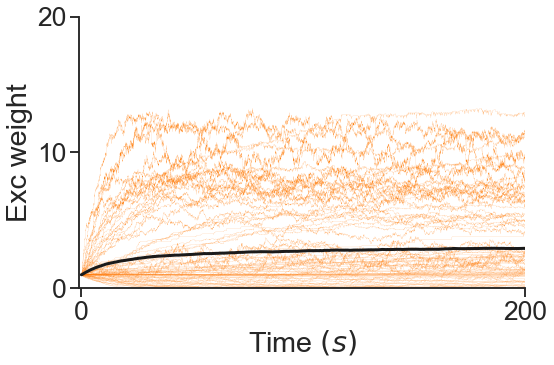

In [20]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":0.1})

beta_indx = 7
for i in range(100):
    plt.plot(time_axis,Jee_recorded[beta_indx][0][i],color='tab:orange',
             label="$beta=%.1f$" %beta_ee_kohonen_vector[beta_indx])
# plt.axhline(y=J_ee_theory[0],color='tab:blue',linestyle='--')
plt.plot(time_axis,mean_Jee_recorded[beta_indx,:],color='k',linewidth=3)


plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((-1,T/1000))
plt.ylim(0,20.)

plt.xticks((0,T/1000))
plt.yticks((0,10,20))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig2-kohonenStability/stability_kohonen_sims_beta2.pdf",bbox_inches="tight")



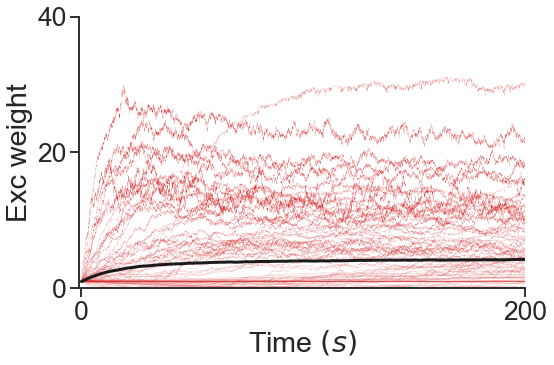

In [21]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":0.1})

beta_indx = 12
for i in range(100):
    plt.plot(time_axis,Jee_recorded[beta_indx][0][i],color='tab:red',
             label="$beta=%.1f$" %beta_ee_kohonen_vector[beta_indx])
# plt.axhline(y=J_ee_theory[0],color='tab:blue',linestyle='--')
plt.plot(time_axis,mean_Jee_recorded[beta_indx,:],color='k',linewidth=3)



plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((-1,T/1000))
plt.ylim(0,40.)

plt.xticks((0,T/1000))
plt.yticks((0,20,40))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig2-kohonenStability/stability_kohonen_sims_beta3.pdf",
            bbox_inches="tight")

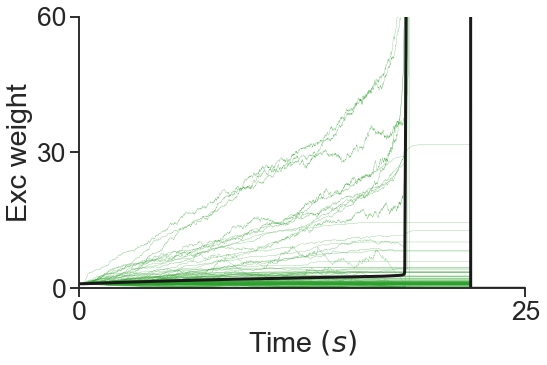

In [24]:
# Plot mean EE weight over time for different timescales 'eta'.
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.6, rc={"lines.linewidth":0.2})

beta_indx = 13
for i in range(200):
    plt.plot(time_axis,Jee_recorded[beta_indx][0][i],color='tab:green',
             label="$beta=%.1f$" %beta_ee_kohonen_vector[beta_indx])
# plt.axhline(y=J_ee_theory[0],color='tab:blue',linestyle='--')
plt.plot(time_axis,mean_Jee_recorded[beta_indx,:],color='k',linewidth=3)



plt.xlabel(r'Time $(s)$')
plt.ylabel(r'Exc weight')

plt.xlim((0,25))
plt.ylim(0,60.)

plt.xticks((0,25))
plt.yticks((0,30,60))

sns.despine()
plt.show()

fig.savefig("./PlotsReview_BNs/Fig2-kohonenStability/stability_kohonen_sims_beta4.pdf",
            bbox_inches="tight")

